#**Iris Classification - Project**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets

## Dataset

In [3]:
iris = datasets.load_iris() #loading the dataset

In [4]:
iris.target.shape #output class or y

(150,)

In [5]:
iris.data.shape #shape of the features

(150, 4)

In [6]:
df = pd.DataFrame(iris.data) # turning the values to a DataFrame Object

In [7]:
df['target'] = iris.target

In [8]:
columns_map = {
    0:"Sepal Length",
    1:"Sepal Width",
    2:"Petal Length",
    3:"Petal Width",
}

In [9]:
df = df.rename(columns_map,axis=1)

In [10]:
df.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
target          0
dtype: int64

In [11]:
df['target'].value_counts() #all the classes are equally distributed, no bias.

0    50
1    50
2    50
Name: target, dtype: int64

## EDA

In [12]:
df.describe().T #stastictical inference from the dataset.

,count,mean,std,min,25%,50%,75%,max
Sepal Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


### Correlation Matrix

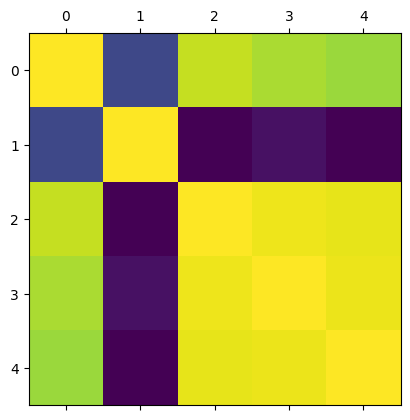

In [13]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

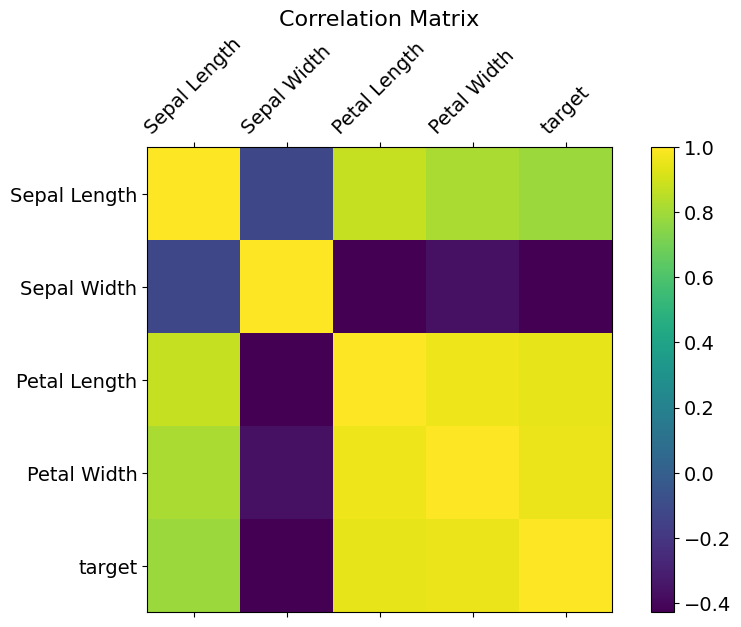

In [16]:
f = plt.figure(figsize=(10, 6))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [23]:
corr = df.corr('pearson')
# corr.style.background_gradient(cmap='coolwarm')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(color='#f1f1f1')  # Color NaNs grey

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
Sepal Length,nan,nan,nan,nan,nan
Sepal Width,-0.117570,nan,nan,nan,nan
Petal Length,0.871754,-0.428440,nan,nan,nan
Petal Width,0.817941,-0.366126,0.962865,nan,nan
target,0.782561,-0.426658,0.949035,0.956547,nan
